Nguyen Vinh Nghi - CE182108

# Import Lib

In [40]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import PIL

========================

In [41]:
f1, f2 = np.meshgrid(np.arange(2, 8), np.arange(3, 15))
X = f1.flatten()
Y = f2.flatten()

In [42]:
def draw_quadrangle(X, Y, color='b', limX=[-50,50], limY=[-50,50]):
    plt.scatter(X, Y, color=color)
    plt.xlim(limX)
    plt.ylim(limY)

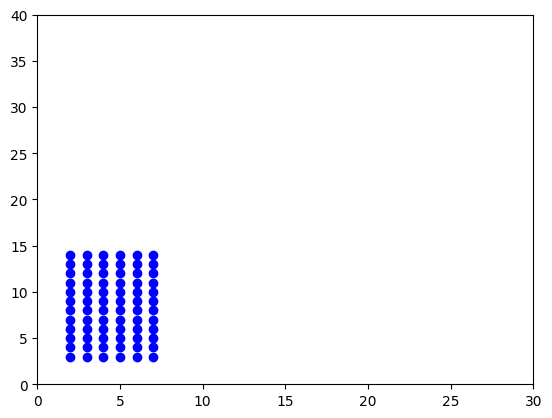

In [43]:
draw_quadrangle(X, Y, limX=[0, 30], limY=[0, 40], color='b')

==========================

In [44]:
translate_matrix = np.array([
    [1, 0, 15],
    [0, 1, 20],
    # [0, 0, 1]
])

translate_matrix

array([[ 1,  0, 15],
       [ 0,  1, 20]])

In [45]:
contours = np.vstack([X, Y, np.ones(len(X))])
print(contours.shape)

(3, 72)


In [46]:
translated_points = np.matmul(translate_matrix, contours)

In [47]:
trans_X = translated_points[0]
trans_Y = translated_points[1]

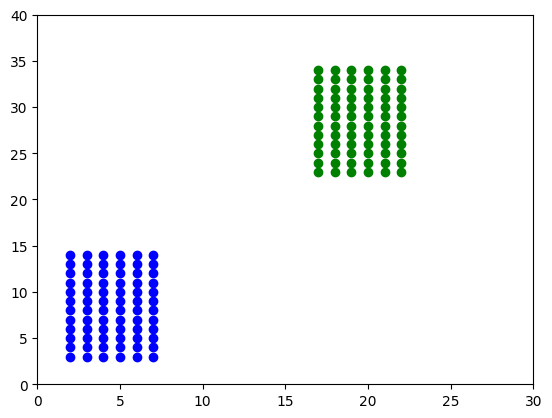

In [48]:
draw_quadrangle(X, Y, limX=[0, 30], limY=[0, 40], color='b')
draw_quadrangle(trans_X, trans_Y, limX=[0, 30], limY=[0, 40], color='g')

============================

In [49]:
theta = 60*np.pi/180

rotation_matrix = np.array(
    [[np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0]]
)

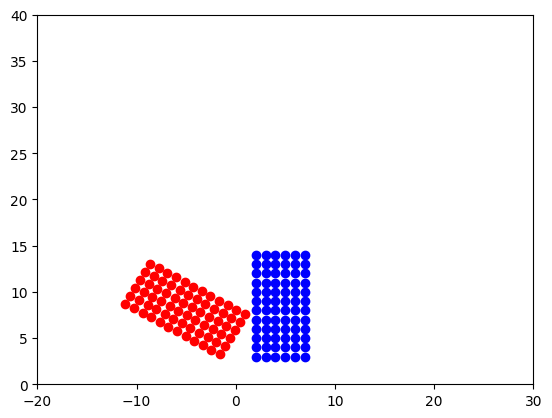

In [50]:
rotated_points = np.matmul(rotation_matrix, contours)
rotated_X = rotated_points[0]
rotated_Y = rotated_points[1]

draw_quadrangle(X, Y, limX=[0, 30], limY=[0, 40], color='b')
draw_quadrangle(rotated_X, rotated_Y, limX=[-20, 30], limY=[0, 40], color='r')

========================

In [51]:
scale_x = 3
scale_y = 0.5
trans_x = 15
trans_y = 20

scale_matrix = np.array([
    [scale_x, 0, trans_x],
    [0, scale_y, trans_y],
    [0, 0, 1]
])

scaled_points = np.matmul(scale_matrix, contours)

In [52]:
scaled_X = scaled_points[0]
scaled_Y = scaled_points[1]

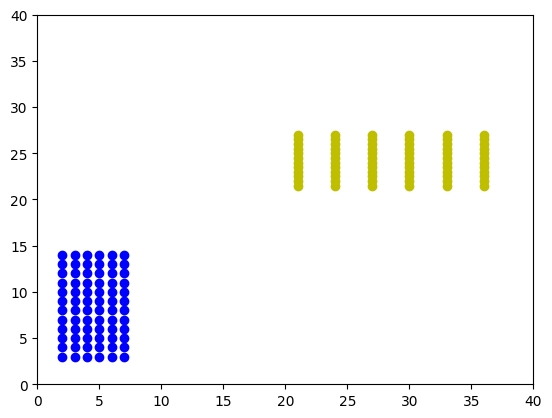

In [53]:
draw_quadrangle(X, Y, limX=[0, 30], limY=[0, 40], color='b')
draw_quadrangle(scaled_X, scaled_Y, limX=[0, 40], limY=[0, 40], color='y')

===========================

In [54]:
affine_matrix = np.array([[5, 5, 10], [5, 7, 70], [0.25, 0.5, 1]])

transformed_points = np.matmul(affine_matrix, contours)

transformed_X = transformed_points[0]/transformed_points[2]
transformed_Y = transformed_points[1]/transformed_points[2]

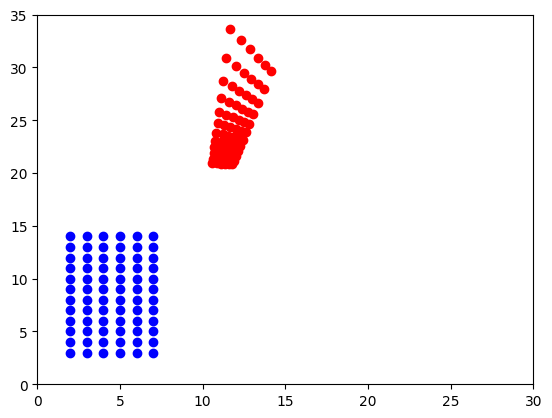

In [55]:
draw_quadrangle(X, Y, limX=[0, 30], limY=[0, 40], color='b')
draw_quadrangle(transformed_X, transformed_Y, limX=[0, 30], limY=[0, 35], color='r')

==================================

In [56]:
P = np.array([2, 3, 1])

In [57]:
transforms = {
    'Reflected across line y=x': np.array(
        [[0, 1, 0],
        [1, 0, 0],
        [0, 0, 1]]
    ),
    'Reflected across Y-axis': np.array(
        [[-1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]
    ),
    'Reflected across X-axis': np.array(
        [[1, 0, 0],
        [0, -1, 0],
        [0, 0, 1]]
    ),
}

In [58]:
transformed_points = dict()

for transform, matrix in transforms.items():
    transformed_point = np.matmul(matrix, P)
    transformed_points[transform] = transformed_point

In [59]:
transformed_points

{'Reflected across line y=x': array([3, 2, 1]),
 'Reflected across Y-axis': array([-2,  3,  1]),
 'Reflected across X-axis': array([ 2, -3,  1])}

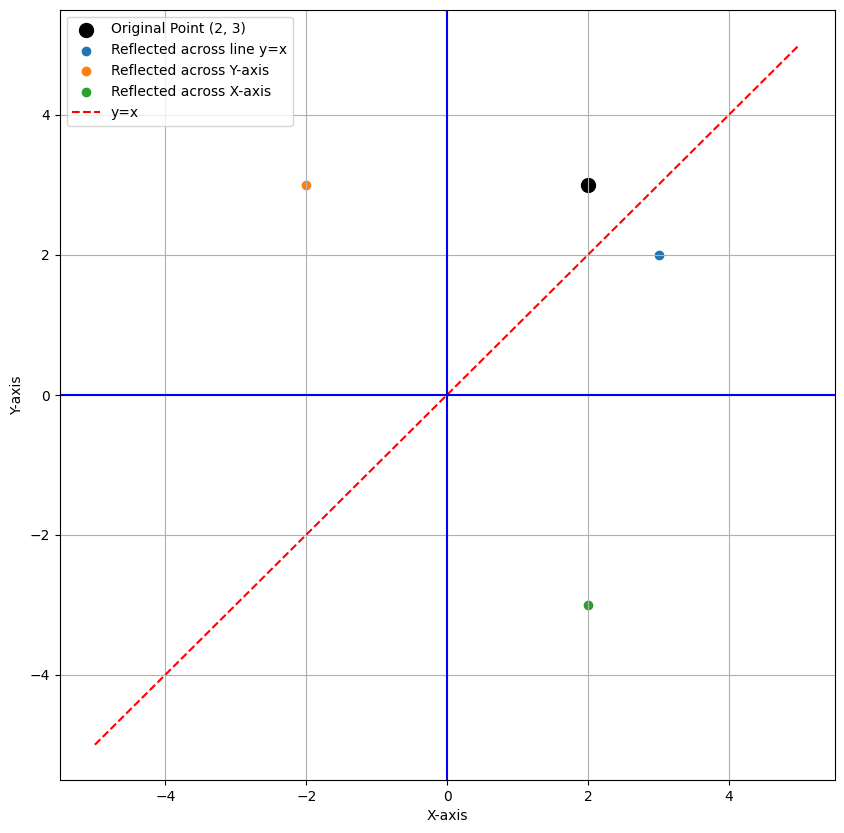

In [60]:
fig = plt.figure(figsize=(10, 10))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
ax = fig.gca()

ax.scatter(P[0], P[1], label='Original Point (2, 3)', s=100, color='black')

for transform, point in transformed_points.items():
    ax.scatter(point[0], point[1], label=transform)

x = np.linspace(-5,5,100)
y = x
plt.plot(x, y, '--', label='y=x', color='r')


plt.axhline(0, color='blue')
plt.axvline(0, color='blue')
plt.legend()
plt.grid()
plt.show()


=============================

In [61]:
des_img = cv2.imread('./white_board.jpeg')
src_img = cv2.imread('./rover.jpeg')

print("Destination size: ", des_img.shape)
print("Source size: ", src_img.shape)

Destination size:  (996, 996, 3)
Source size:  (194, 259, 3)


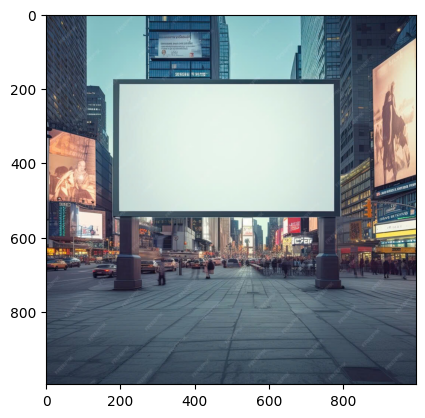

In [62]:
plt.imshow(cv2.cvtColor(des_img, cv2.COLOR_RGB2BGR))

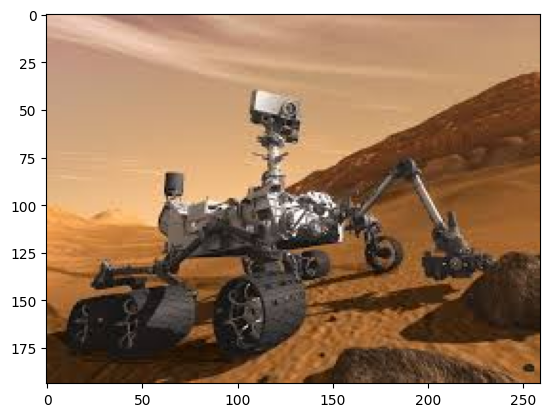

In [63]:
plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_RGB2BGR))

In [64]:
def get_insert_coordinates(des_img):
    gray = cv2.cvtColor(des_img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        contour = max(contours, key=cv2.contourArea)
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        return approx
    return None  # Return None if no contours are found


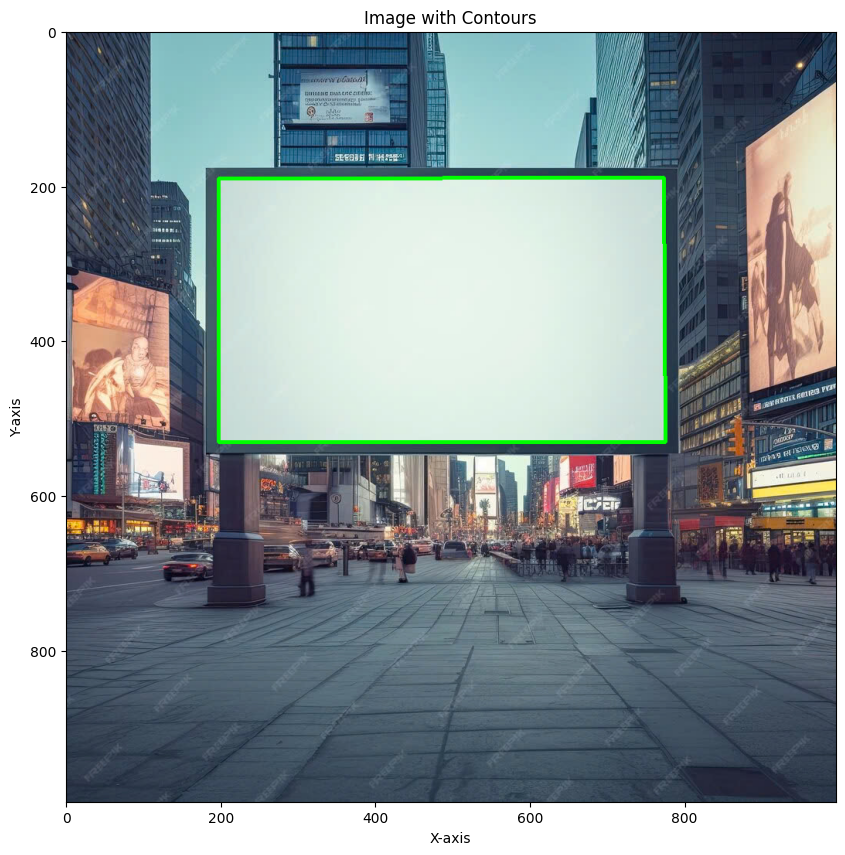

(996, 996, 3)


In [76]:
approx_contours = get_insert_coordinates(des_img)
image_with_contour = des_img.copy()
cv2.drawContours(image_with_contour, [approx_contours], -1, (0, 255, 0), 3)

fig = plt.figure(figsize=(10, 10))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
ax = fig.gca()

res = cv2.cvtColor(image_with_contour, cv2.COLOR_BGR2RGB)
plt.imshow(res)
plt.title('Image with Contours')
plt.show()

print(res.shape)


In [77]:
x_min = np.min(approx_contours[:, 0, 0])
y_min = np.min(approx_contours[:, 0, 1])
w = np.max(approx_contours[:, 0, 0]) - x_min
h = np.max(approx_contours[:, 0, 1]) - y_min

In [78]:
scoords = np.float32([[0, 0], [src_img.shape[1], 0], [0, src_img.shape[0]], [src_img.shape[1], src_img.shape[0]]])
dcoords = np.float32([[x_min, y_min], [x_min + w, y_min], [x_min, y_min + h], [x_min + w, y_min + h]])

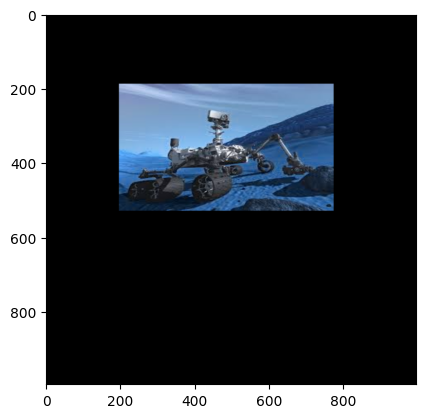

In [79]:
M = cv2.getPerspectiveTransform(scoords, dcoords)
dst = cv2.warpPerspective(src_img, M, (des_img.shape[:2]))
plt.imshow(dst)

In [80]:
result = des_img.copy()
result[y_min:y_min + h, x_min: x_min + w] = dst[y_min:y_min + h, x_min: x_min + w]

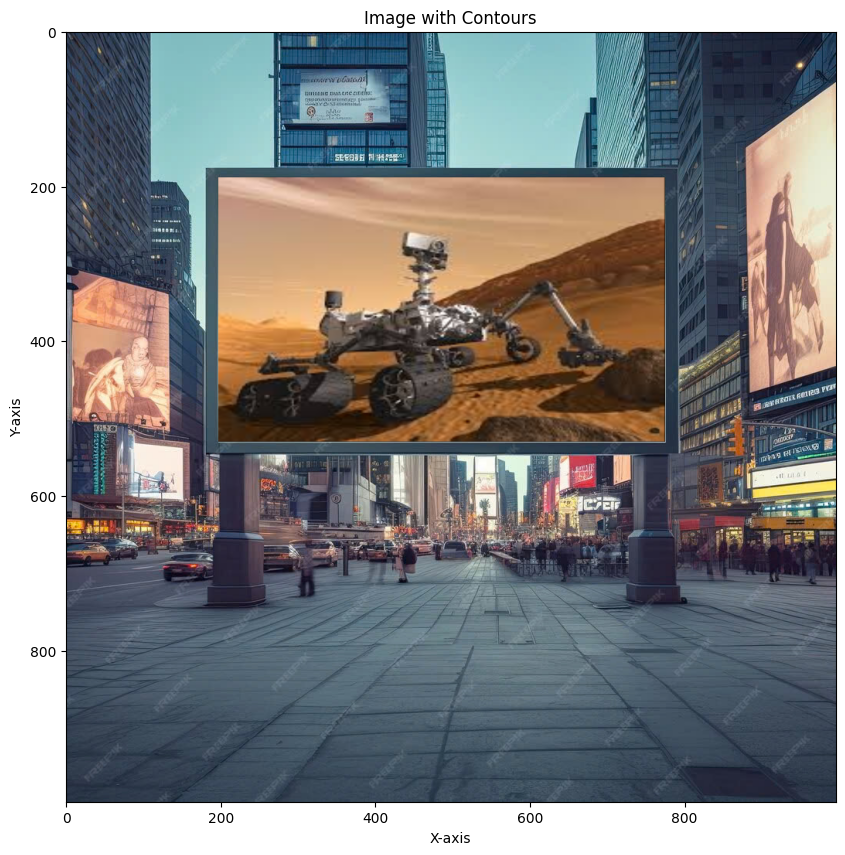

In [81]:
fig = plt.figure(figsize=(10, 10))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
ax = fig.gca()

cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
res = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(res)
plt.title('Image with Contours')
plt.show()